In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as  go
import matplotlib.colors as mcolors

In [2]:
data = pd.read_csv("crop_production.csv")

In [3]:
data.head()

State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0

In [4]:
data.shape

(246091, 7)

In [5]:
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [7]:
data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

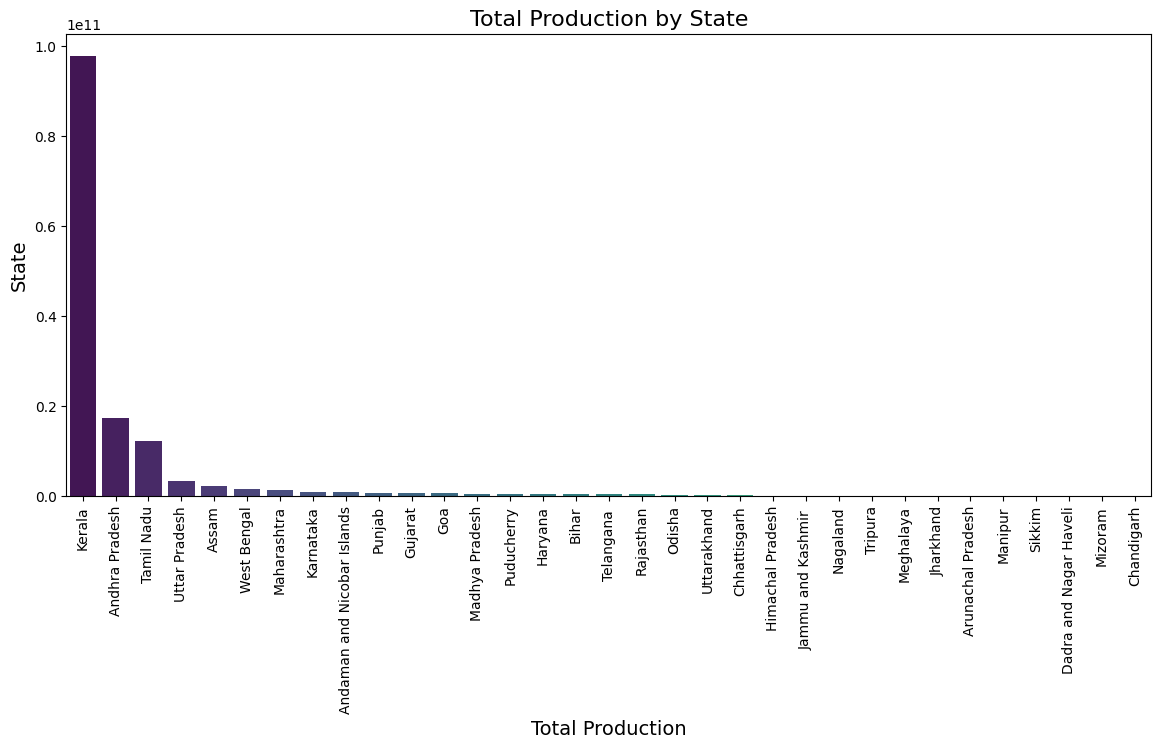

In [8]:
state_production = data.groupby('State_Name')['Production'].sum()
state_production = state_production.sort_values(ascending=False).reset_index()
plt.figure(figsize=(14, 6))
palette = sns.color_palette("viridis", len(state_production))
sns.barplot(y=state_production['Production'], x=state_production['State_Name'],palette=palette, hue=state_production['State_Name'], legend=False)
plt.title('Total Production by State', fontsize=16)
plt.xlabel('Total Production', fontsize=14)
plt.ylabel('State', fontsize=14)
#plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.show()
#state_production

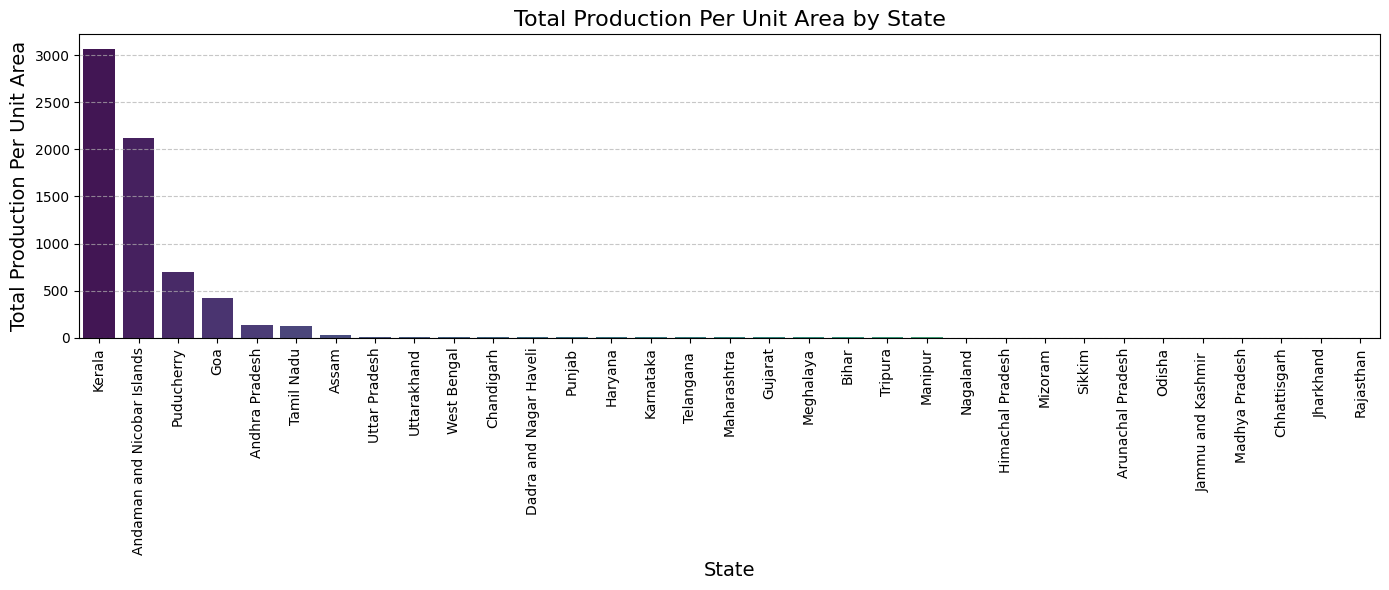

In [9]:
state_data = data.groupby('State_Name').agg({'Production' : 'sum', 'Area' : 'sum'})
state_data['Production_Per_Area'] = state_data['Production'] / state_data['Area']
state_data = state_data.sort_values(by='Production_Per_Area', ascending=False).reset_index()
plt.figure(figsize=(14, 6))
palette = sns.color_palette("viridis", len(state_data))
barplot = sns.barplot(y=state_data['Production_Per_Area'], x=state_data['State_Name'], palette=palette, hue=state_data['State_Name'], legend=False)
plt.title('Total Production Per Unit Area by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Total Production Per Unit Area', fontsize=14)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)
plt.tight_layout()
plt.show()

C:\Users\Abhinav\AppData\Local\Temp\ipykernel_7084\2525082487.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 7))


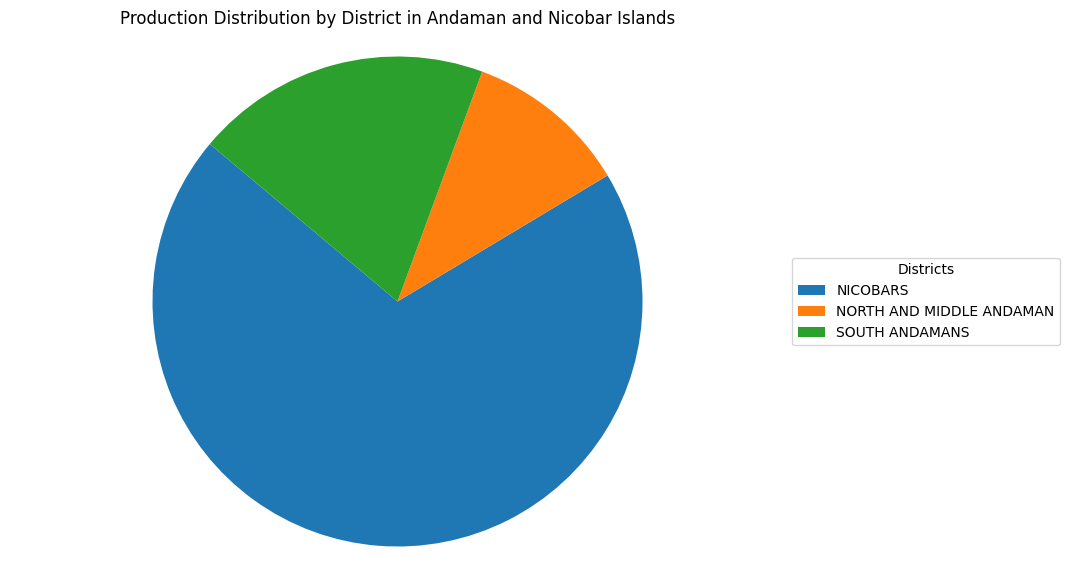

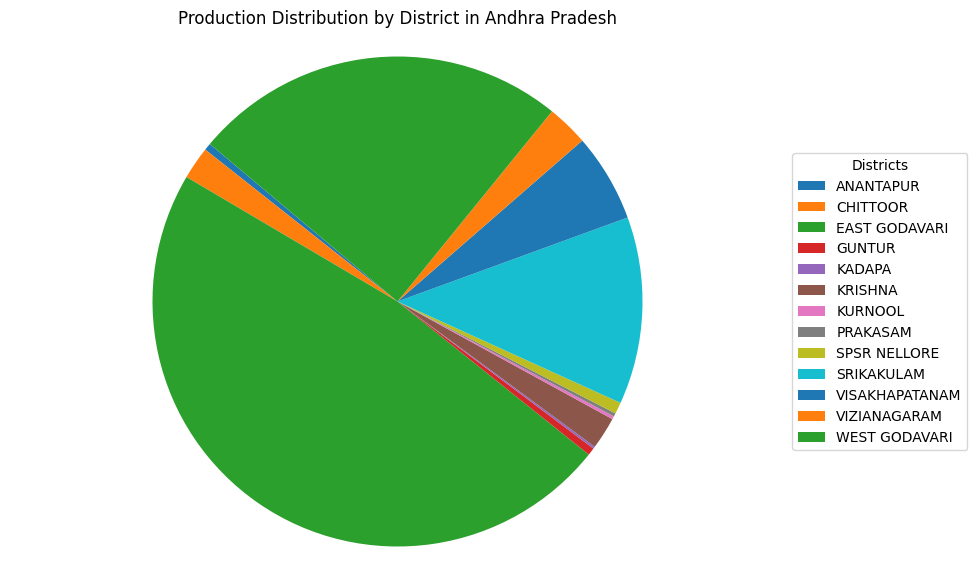

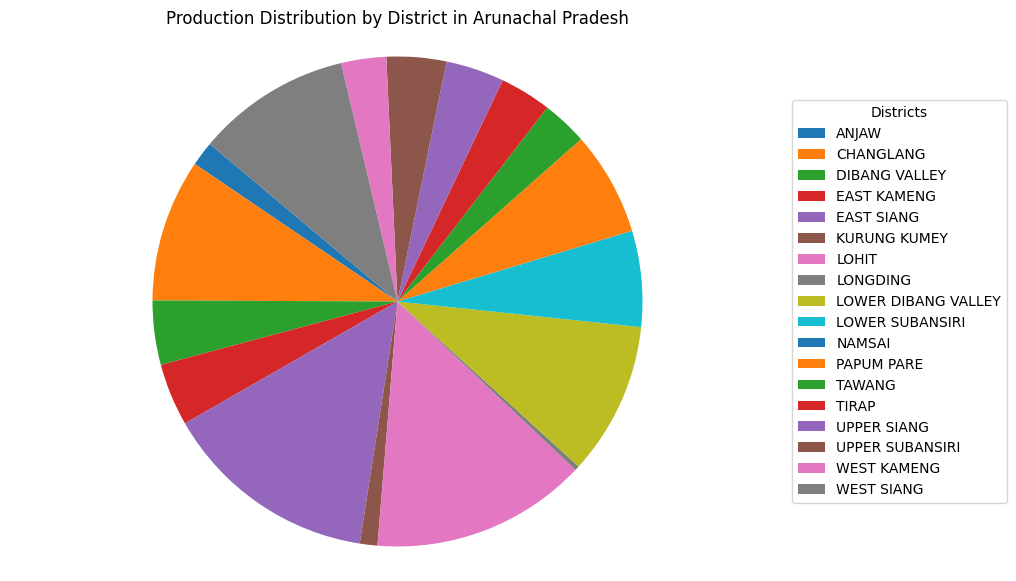

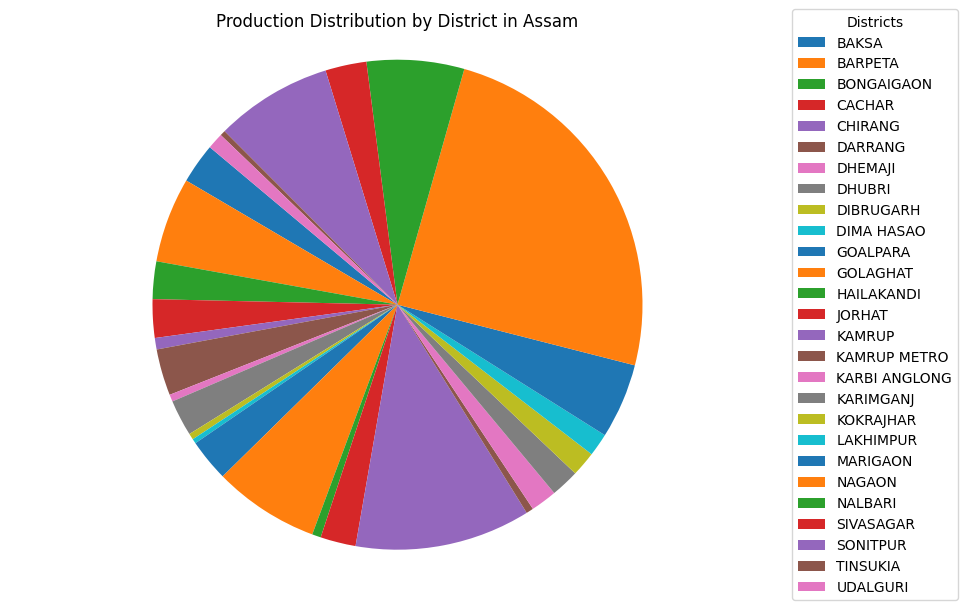

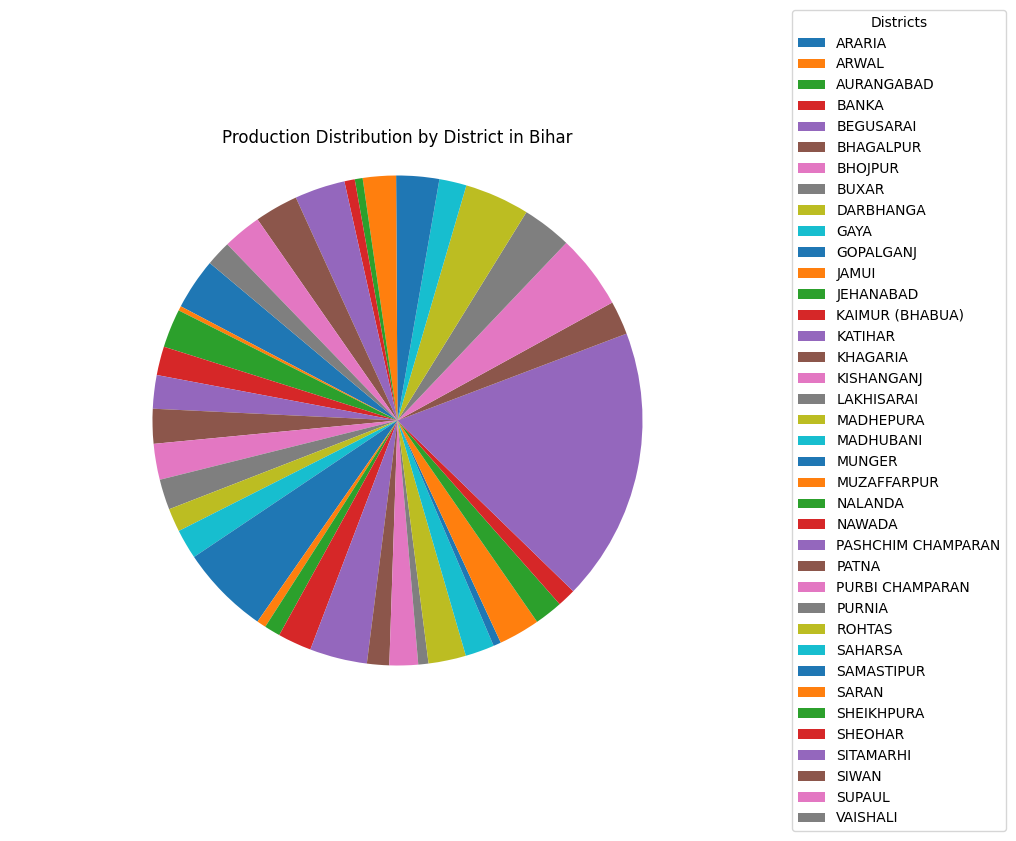

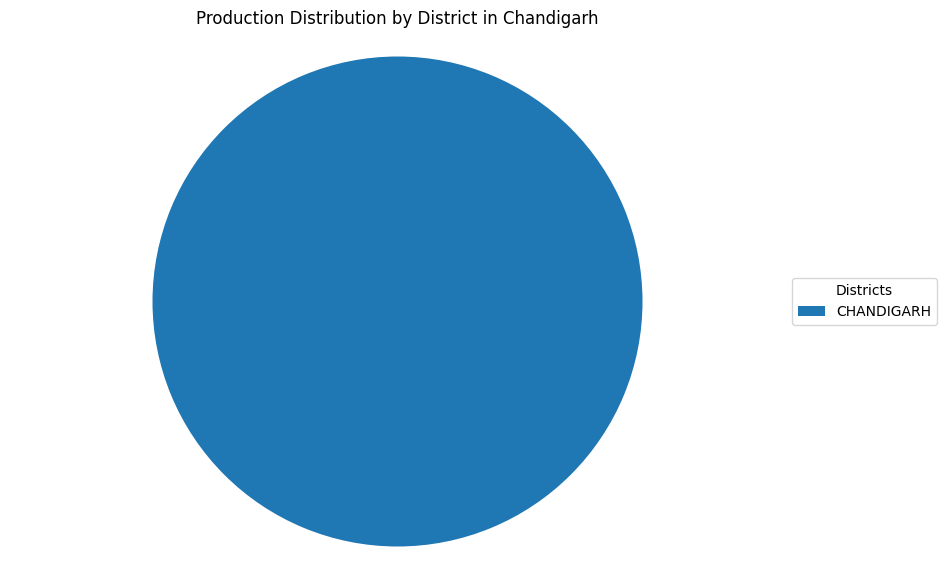

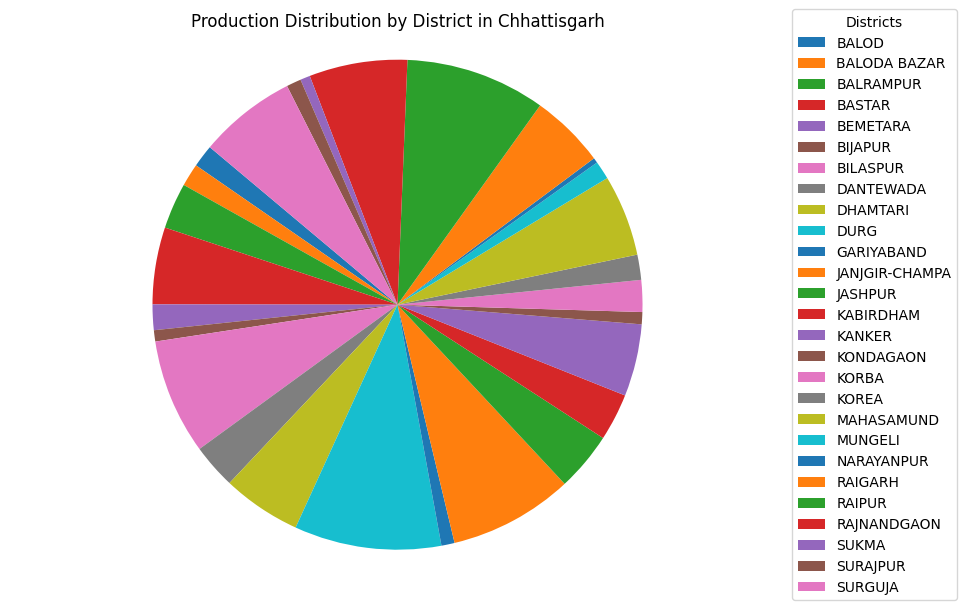

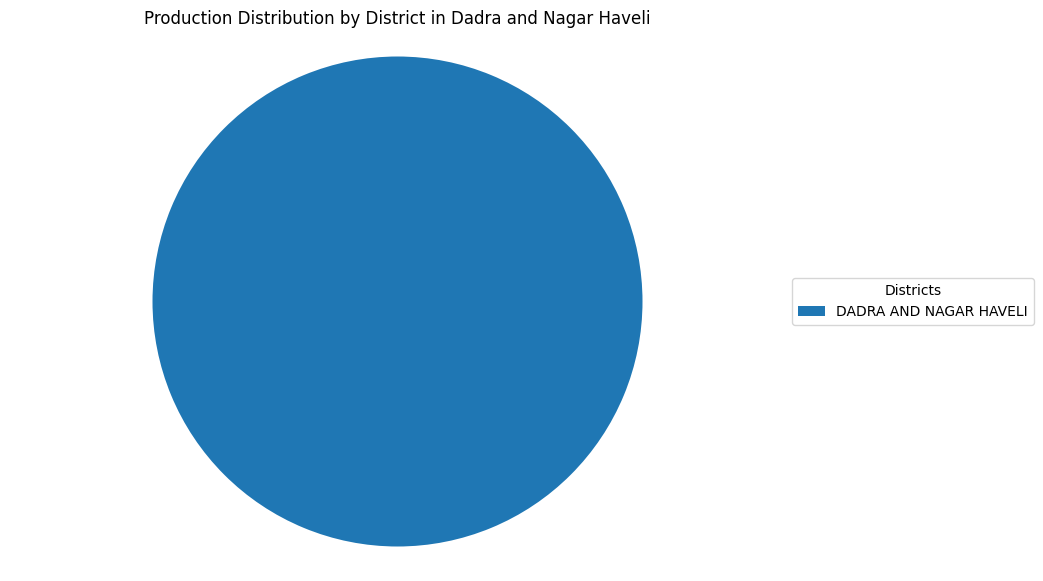

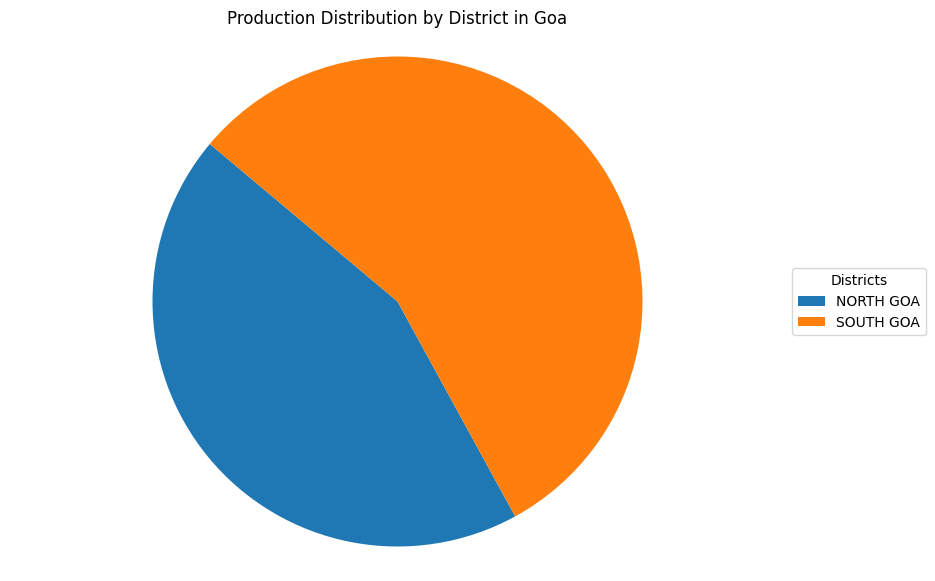

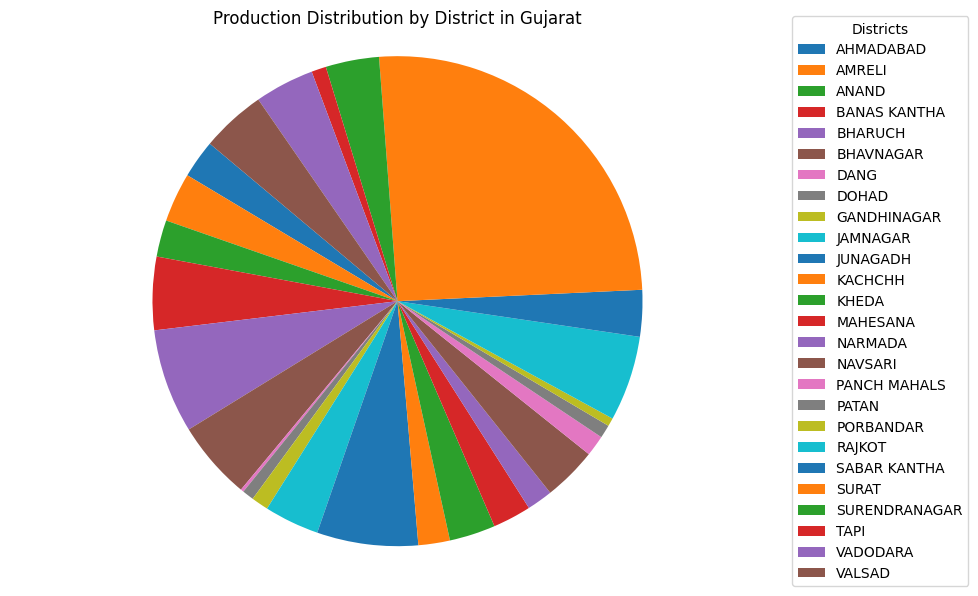

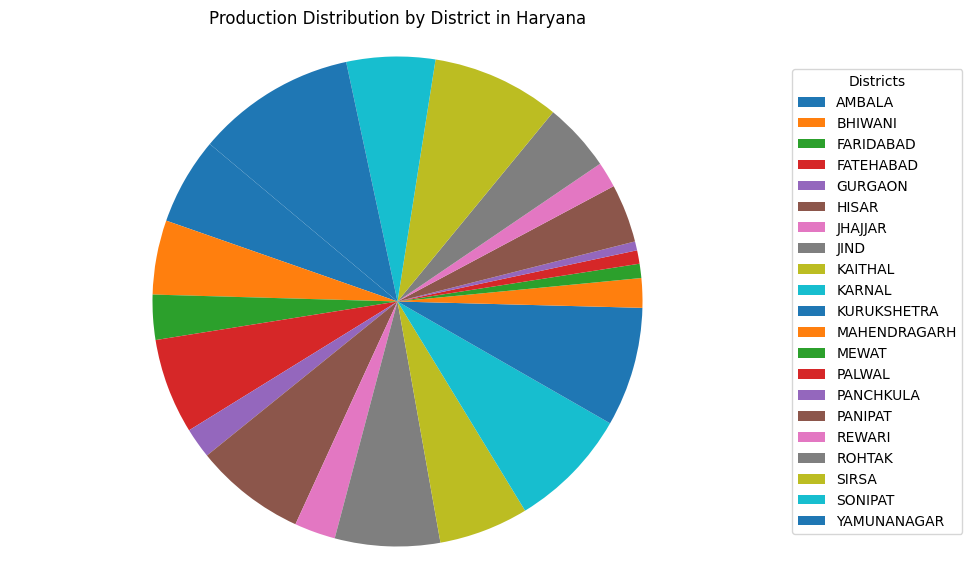

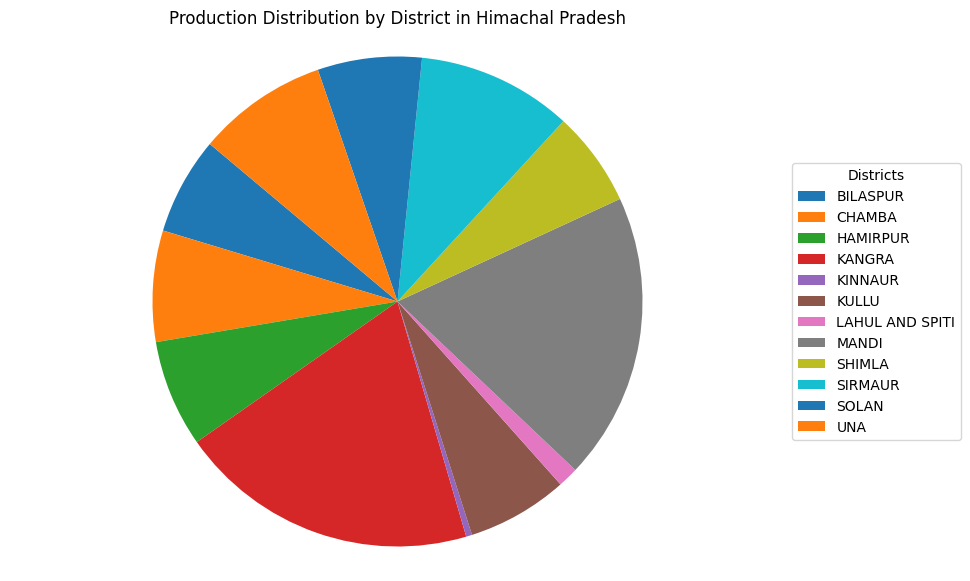

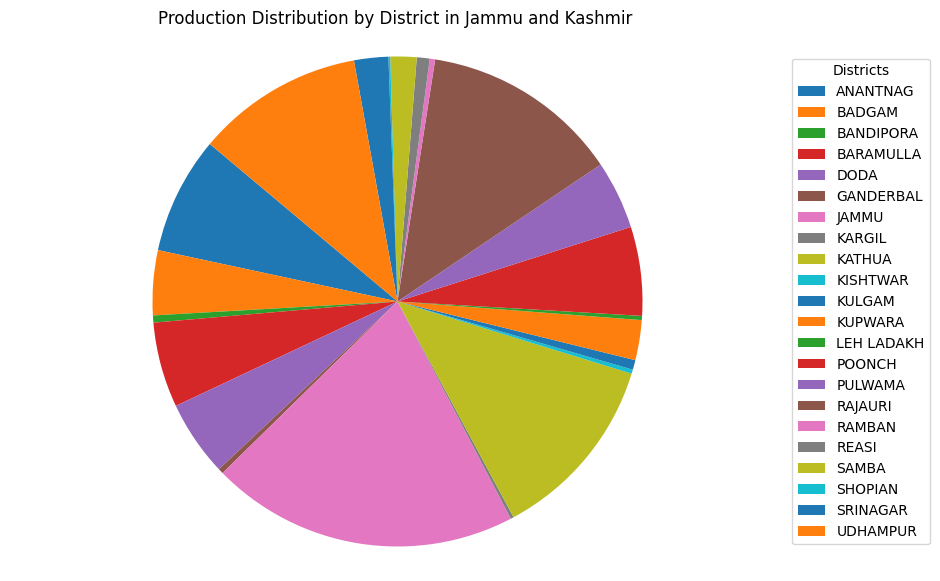

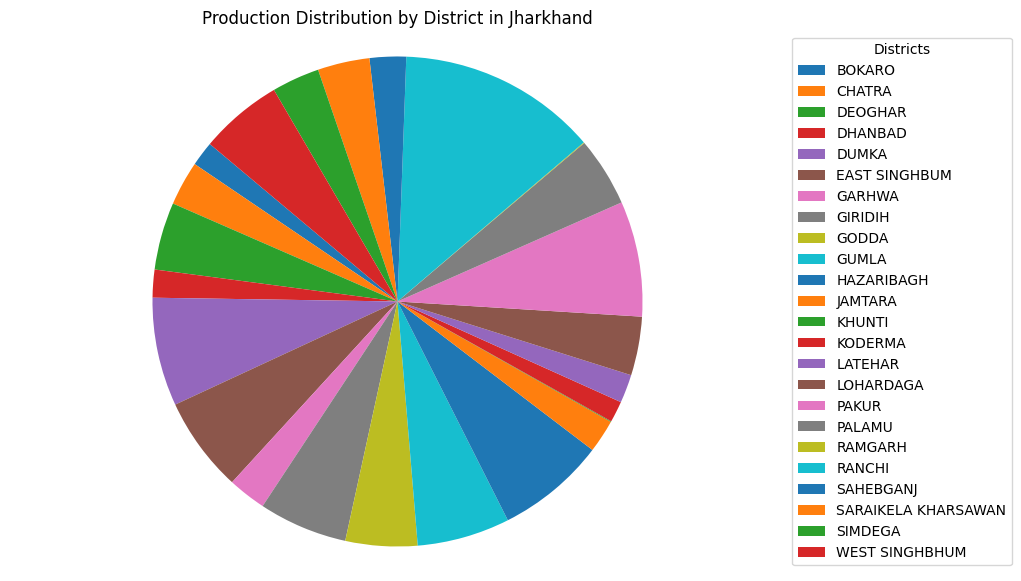

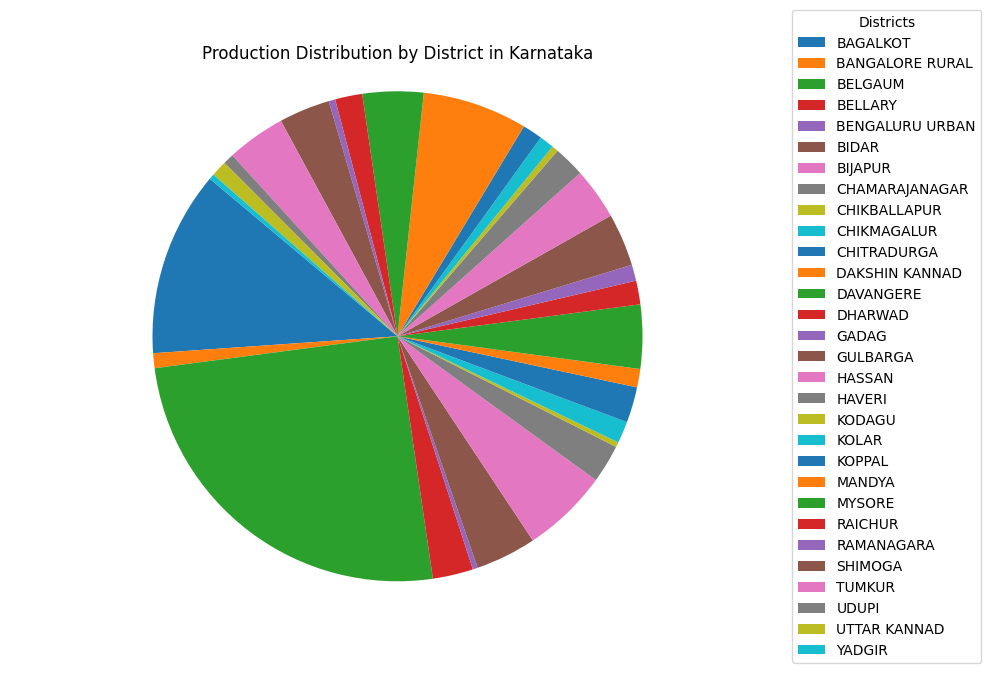

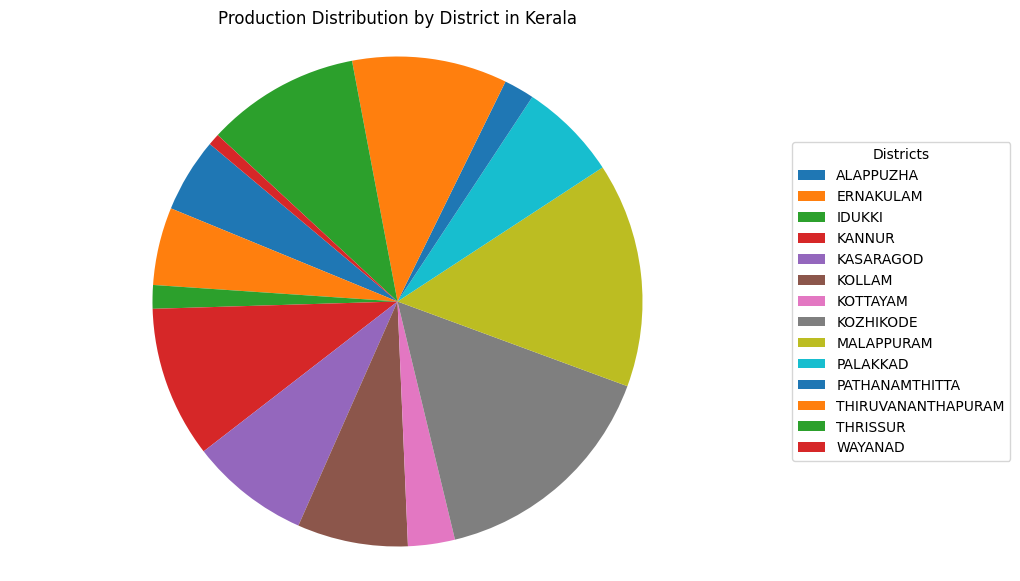

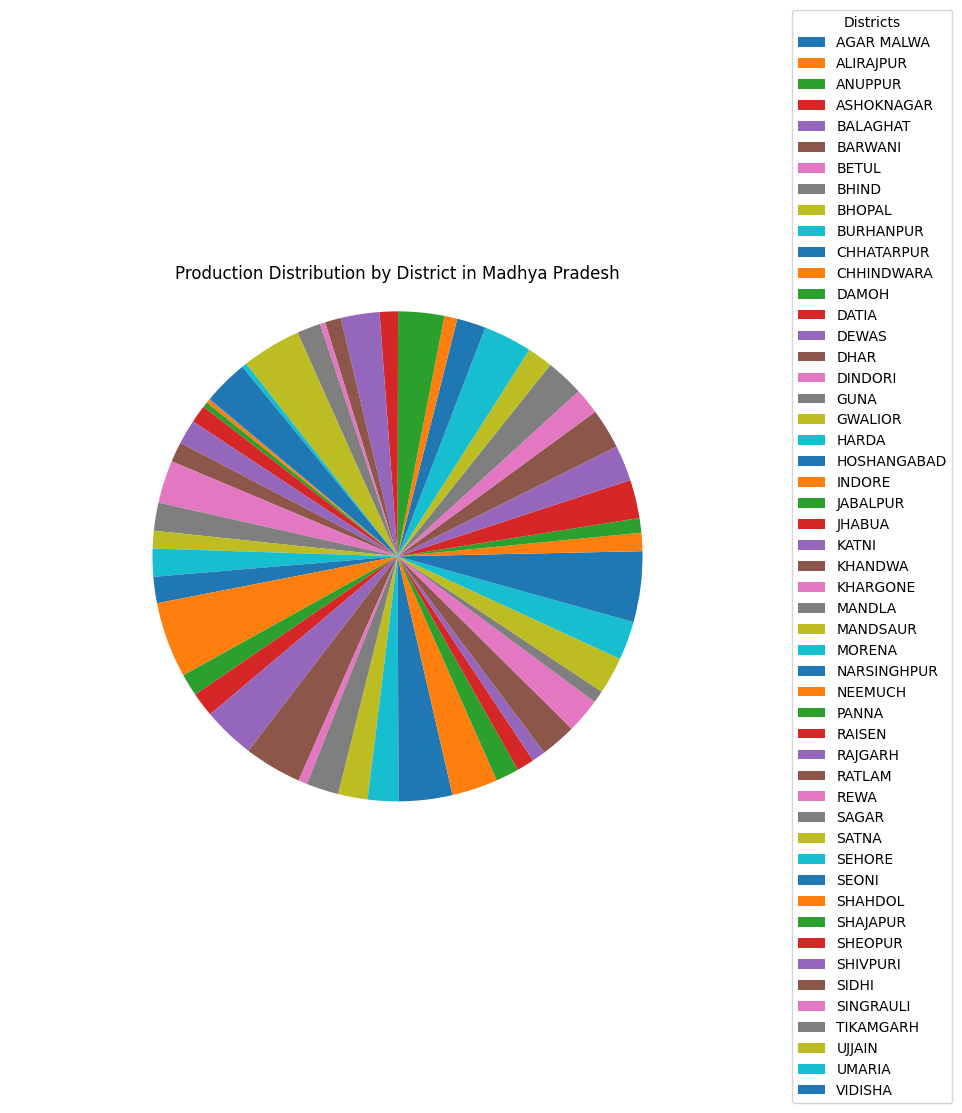

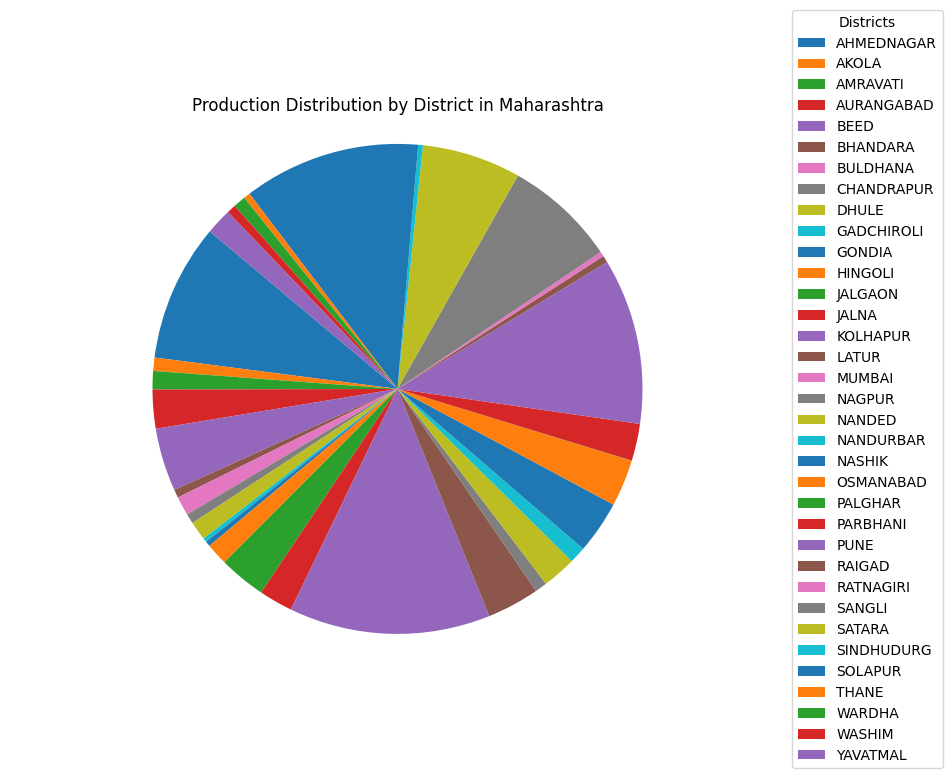

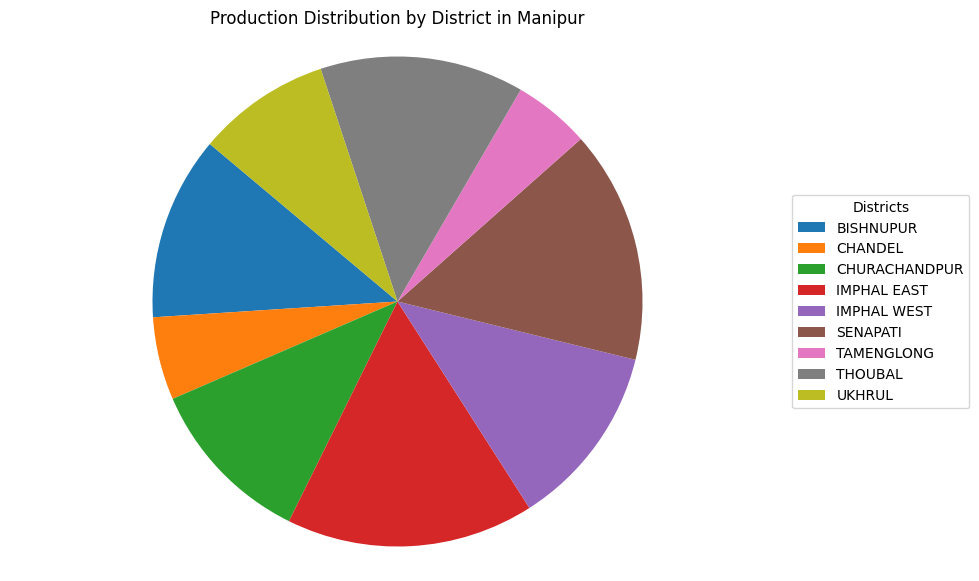

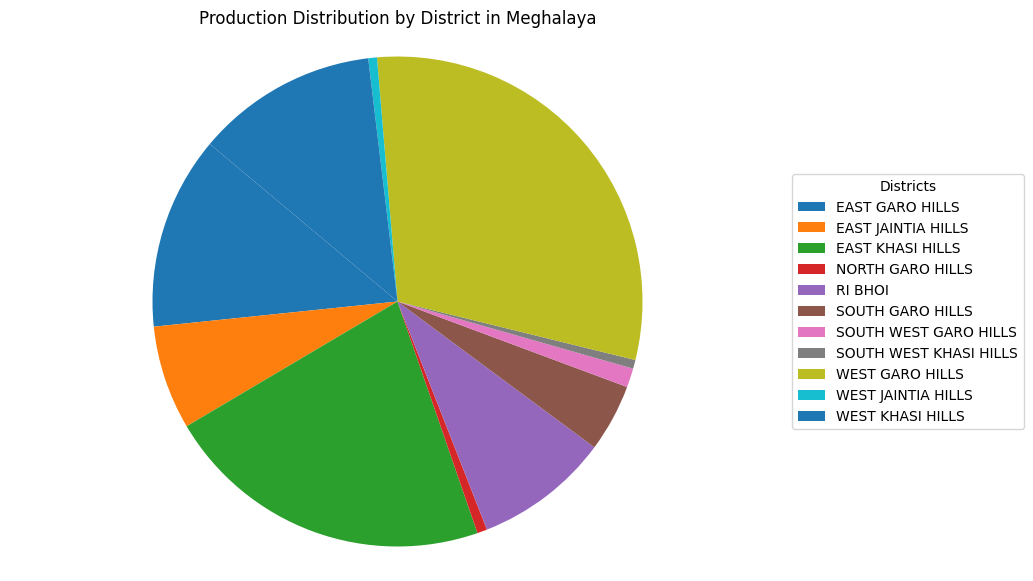

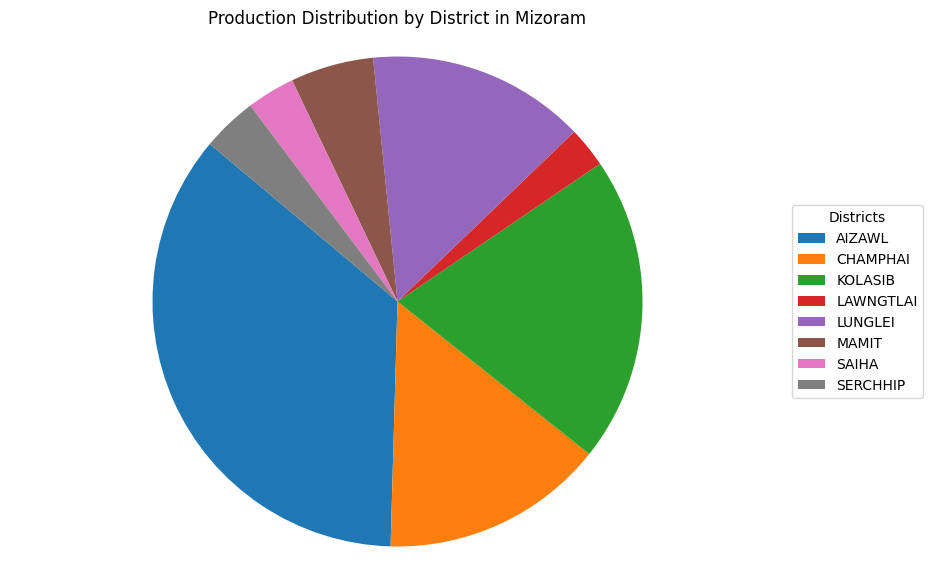

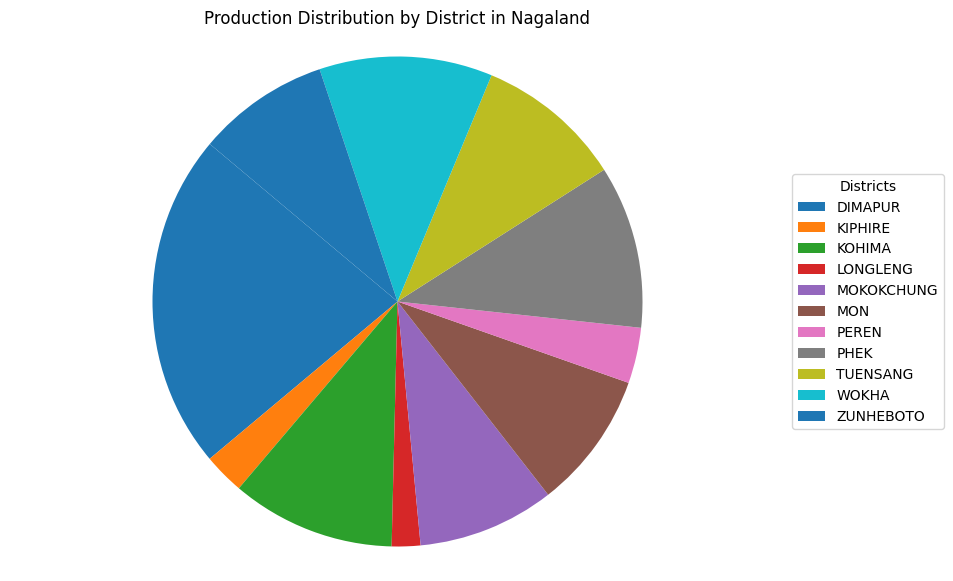

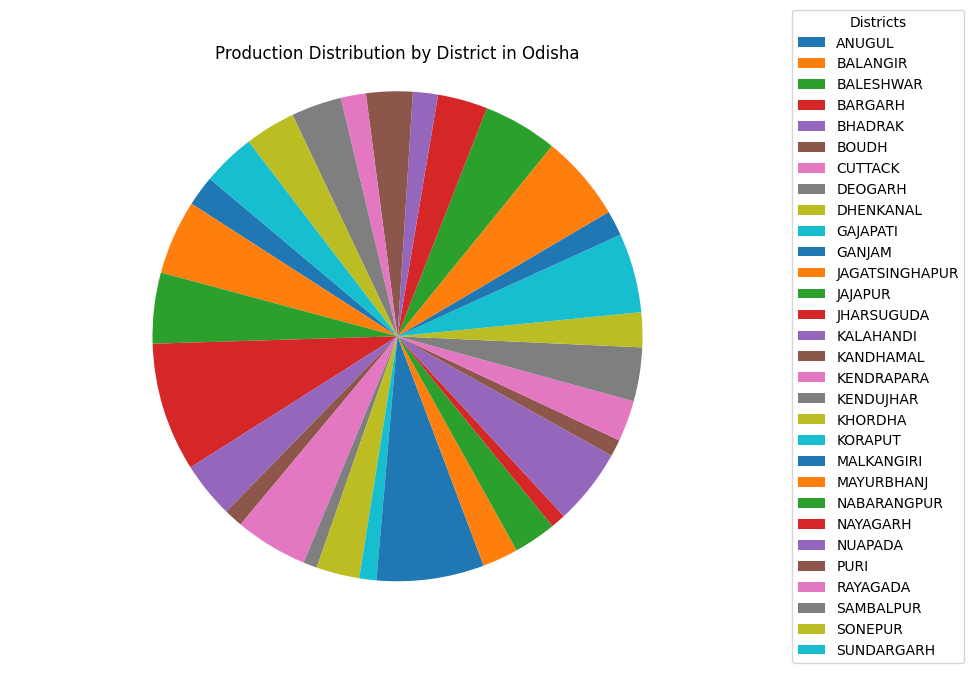

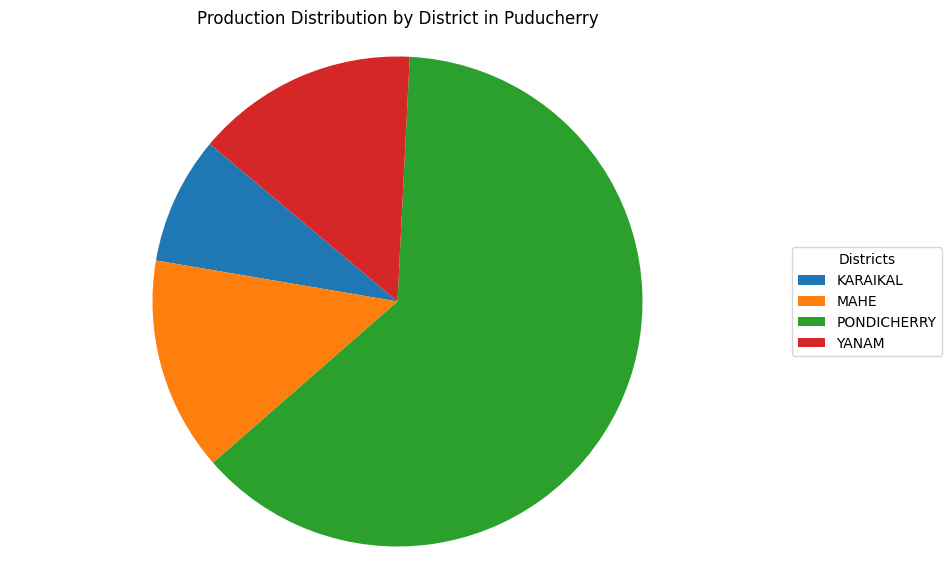

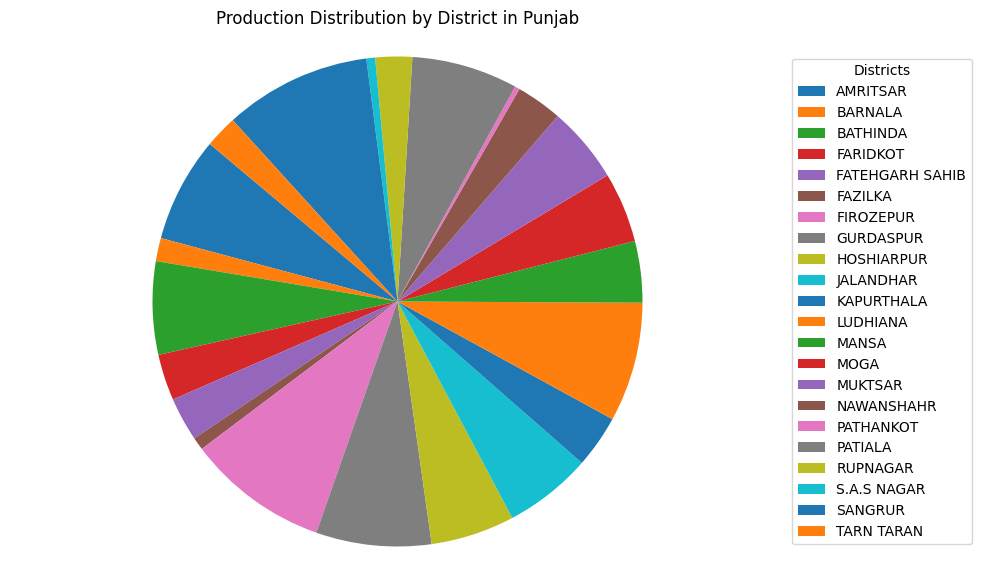

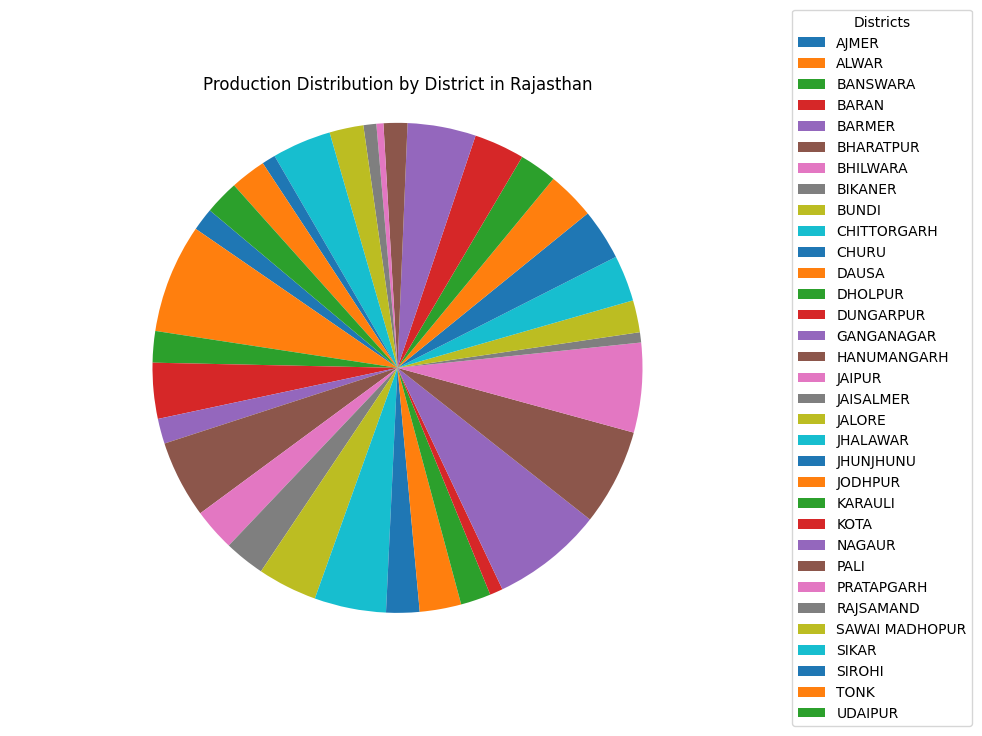

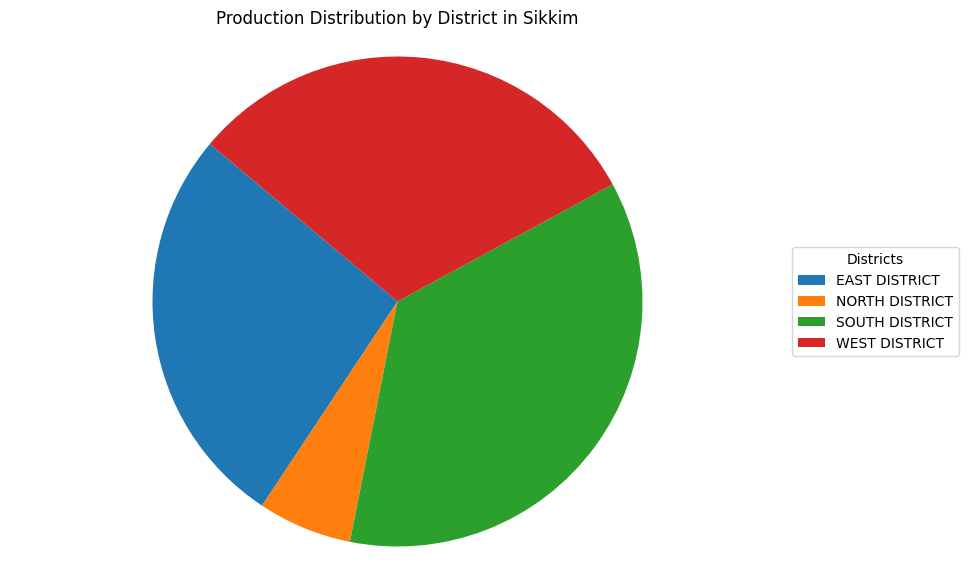

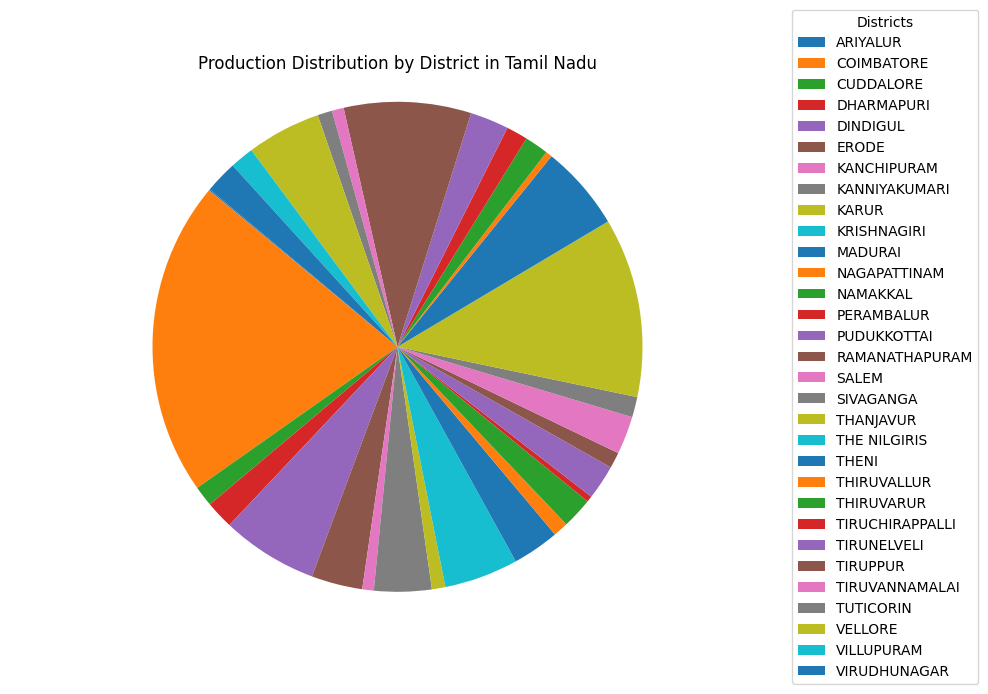

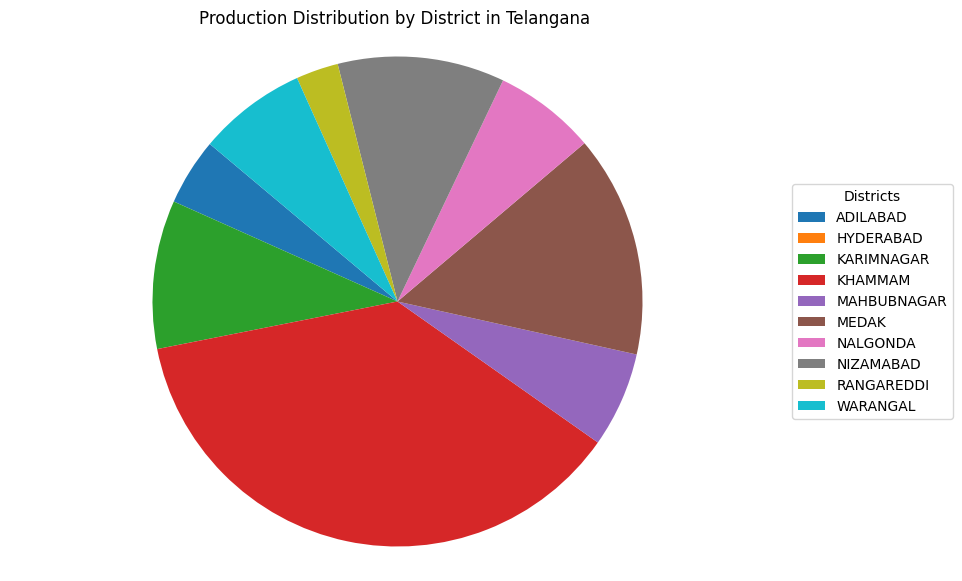

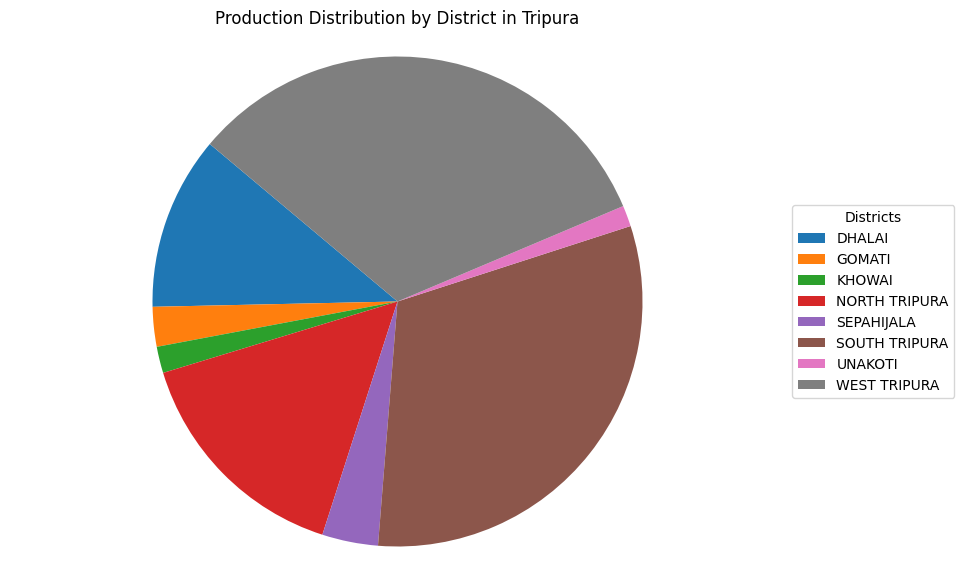

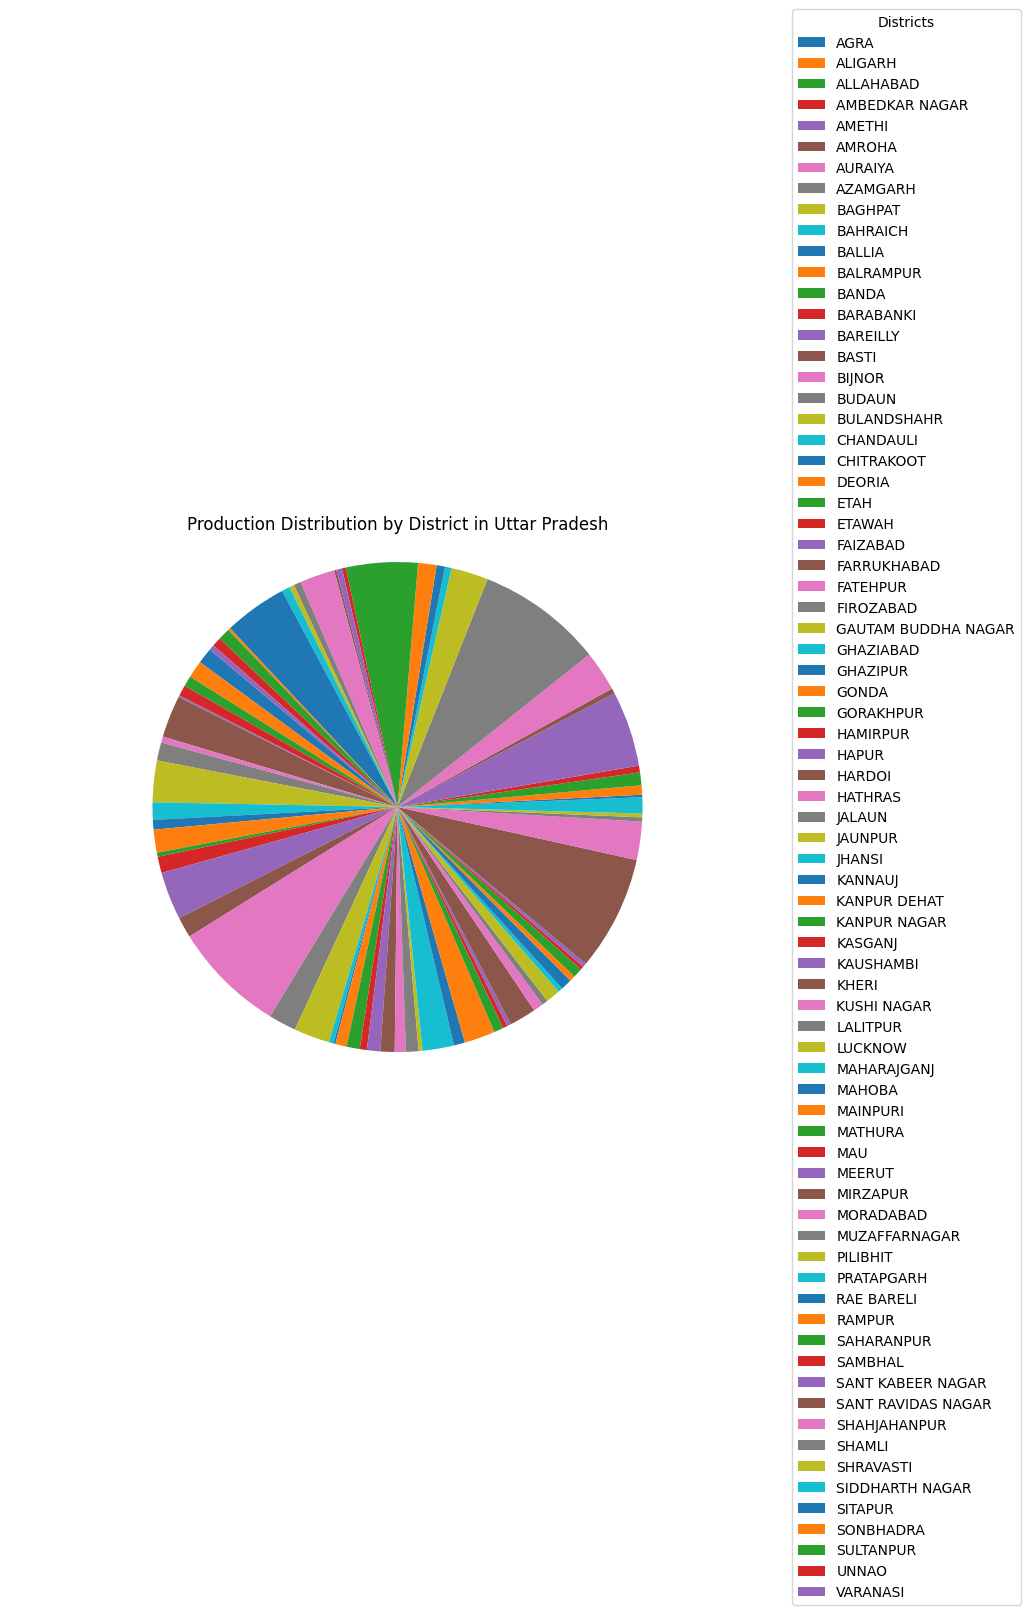

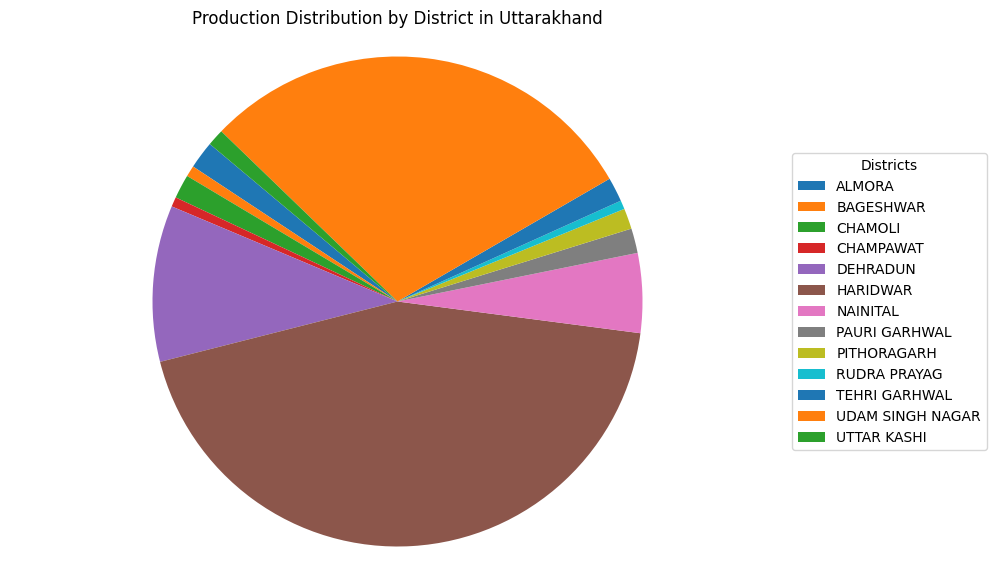

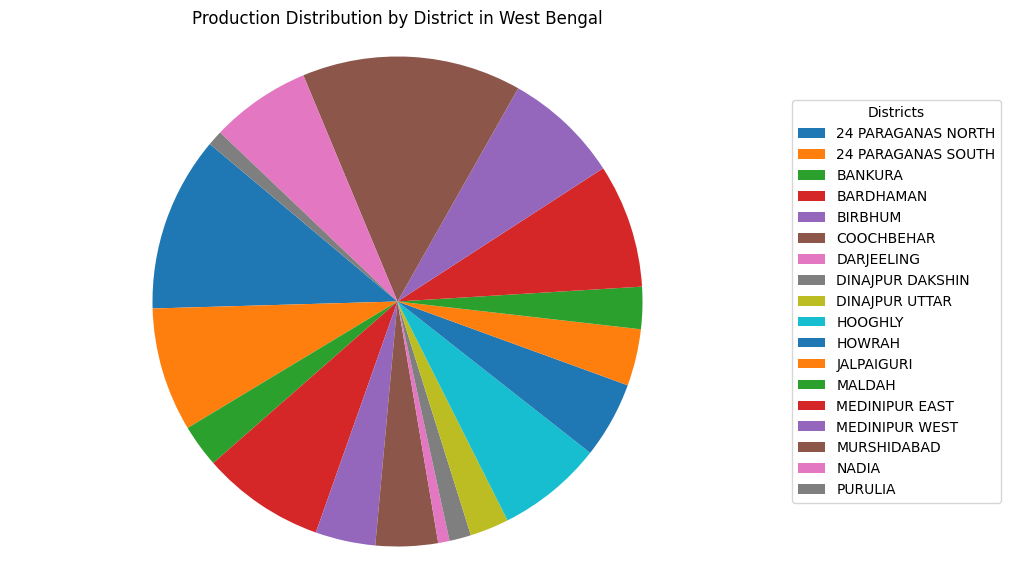

In [10]:
states = data['State_Name'].unique()
for state in states:
#print(f"State: {state}")
    districts = data[data['State_Name'] == state]['District_Name'].unique()
    district_production = []
    district_names = []
    for district in districts:
        production = data[(data['State_Name'] == state) & (data['District_Name'] == district)]['Production'].sum()
        district_production.append(production)
        district_names.append(district)
        #print(f"District: {district}, Production: {production}")
    plt.figure(figsize=(10, 7))
    wedges, texts= plt.pie(district_production, startangle=140)
    plt.title(f'Production Distribution by District in {state}')
    plt.axis('equal')
    plt.legend(wedges, district_names, title="Districts", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

In [11]:
data['Crop'].value_counts()

Crop
Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
                     ...  
Litchi                   6
Coffee                   6
Apple                    4
Peach                    4
Other Dry Fruit          1
Name: count, Length: 124, dtype: int64

In [12]:
data[data['Crop'] == 'Pulses']

Empty DataFrame
Columns: [State_Name, District_Name, Crop_Year, Season, Crop, Area, Production]
Index: []

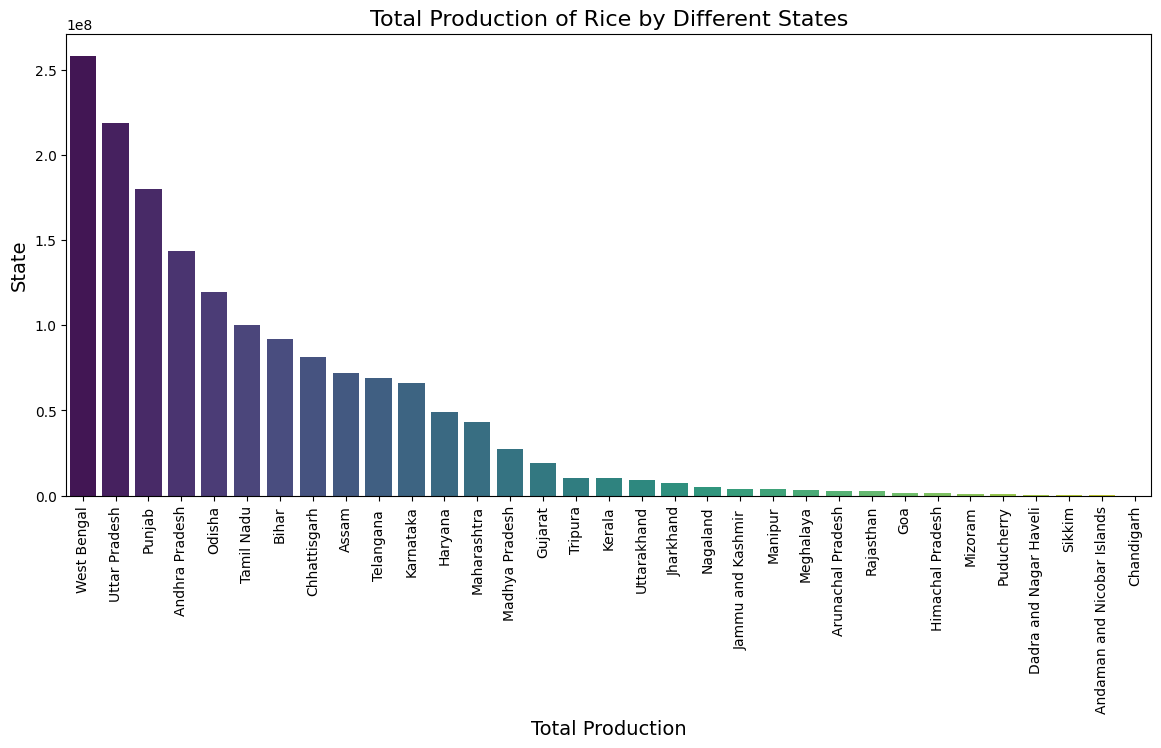

In [13]:
rice_data = data[data['Crop'] == 'Rice'].groupby('State_Name').agg({'Production': 'sum'})
sorted_rice_data = rice_data.sort_values(by='Production', ascending=False)
states = sorted_rice_data.index.to_numpy()
production = sorted_rice_data['Production'].to_numpy()
plt.figure(figsize=(14, 6))
palette = sns.color_palette("viridis", len(rice_data))
sns.barplot(y=production, x=states,palette=palette, hue=states, legend=False)
plt.title('Total Production of Rice by Different States', fontsize=16)
plt.xlabel('Total Production', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.show()

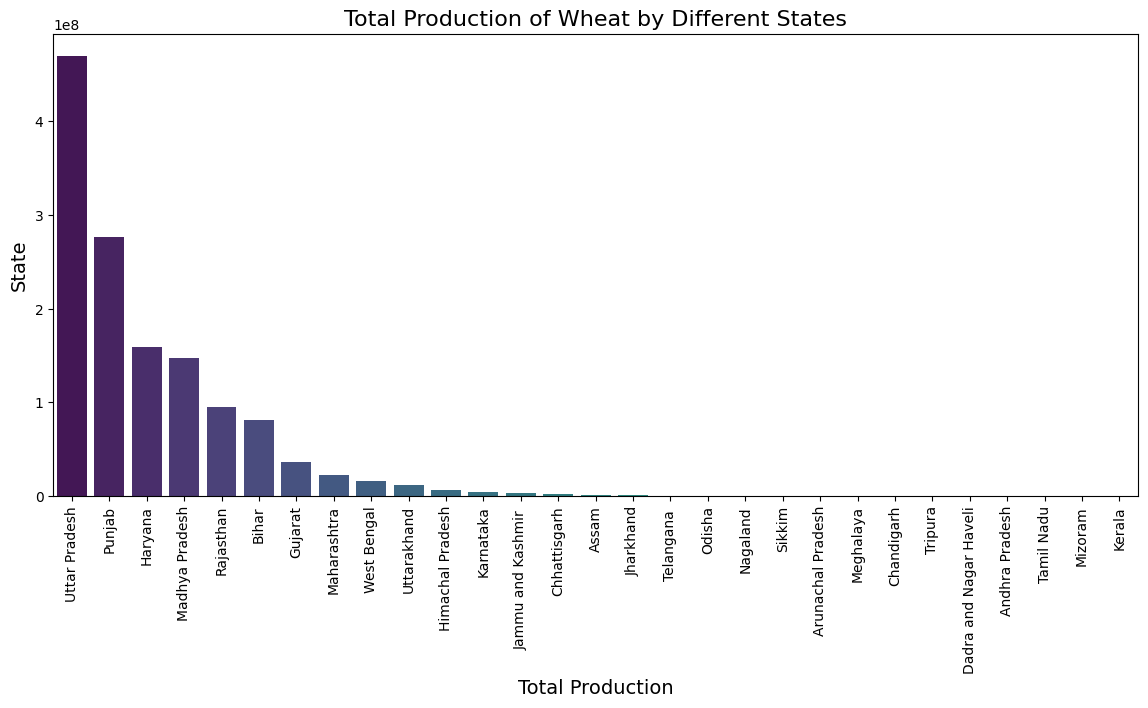

In [14]:
wheat_data = data[data['Crop'] == 'Wheat'].groupby('State_Name').agg({'Production': 'sum'})
sorted_wheat_data = wheat_data.sort_values(by='Production', ascending=False)
states = sorted_wheat_data.index.to_numpy()
production = sorted_wheat_data['Production'].to_numpy()
plt.figure(figsize=(14, 6))
palette = sns.color_palette("viridis", len(wheat_data))
sns.barplot(y=production, x=states,palette=palette, hue=states, legend=False)
plt.title('Total Production of Wheat by Different States', fontsize=16)
plt.xlabel('Total Production', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.show()

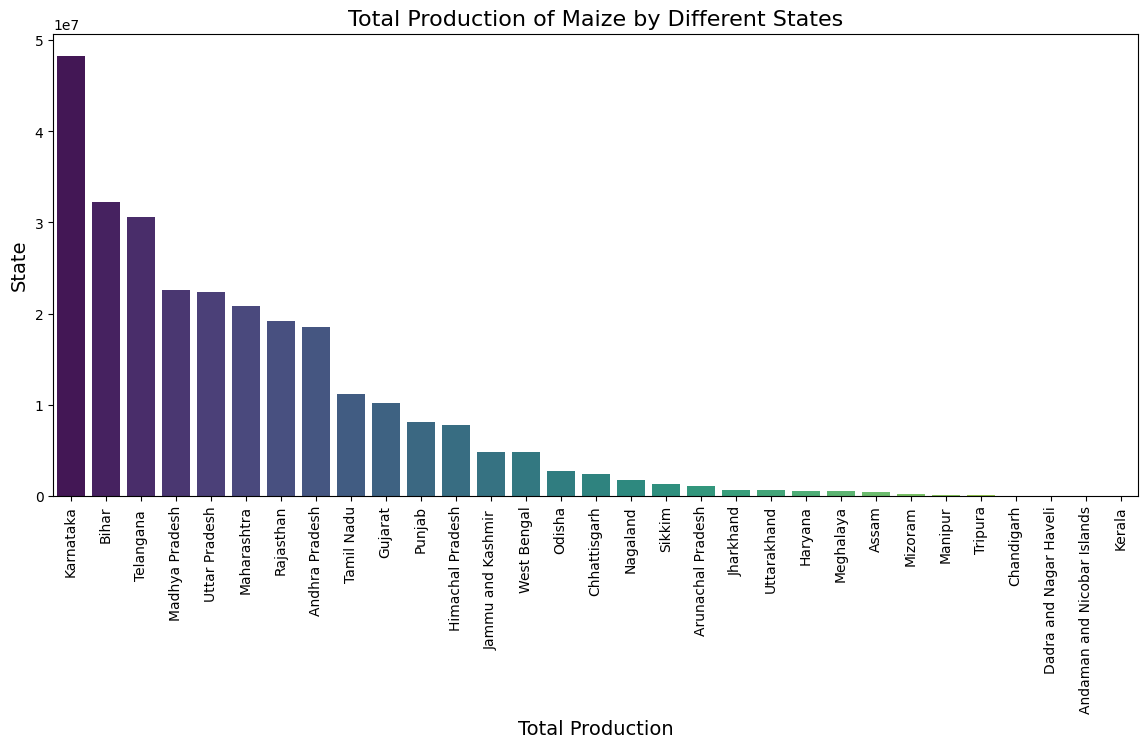

In [15]:
maize_data = data[data['Crop'] == 'Maize'].groupby('State_Name').agg({'Production': 'sum'})
sorted_maize_data = maize_data.sort_values(by='Production', ascending=False)
states = sorted_maize_data.index.to_numpy()
production = sorted_maize_data['Production'].to_numpy()
plt.figure(figsize=(14, 6))
palette = sns.color_palette("viridis", len(maize_data))
sns.barplot(y=production, x=states,palette=palette, hue=states, legend=False)
plt.title('Total Production of Maize by Different States', fontsize=16)
plt.xlabel('Total Production', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.show()

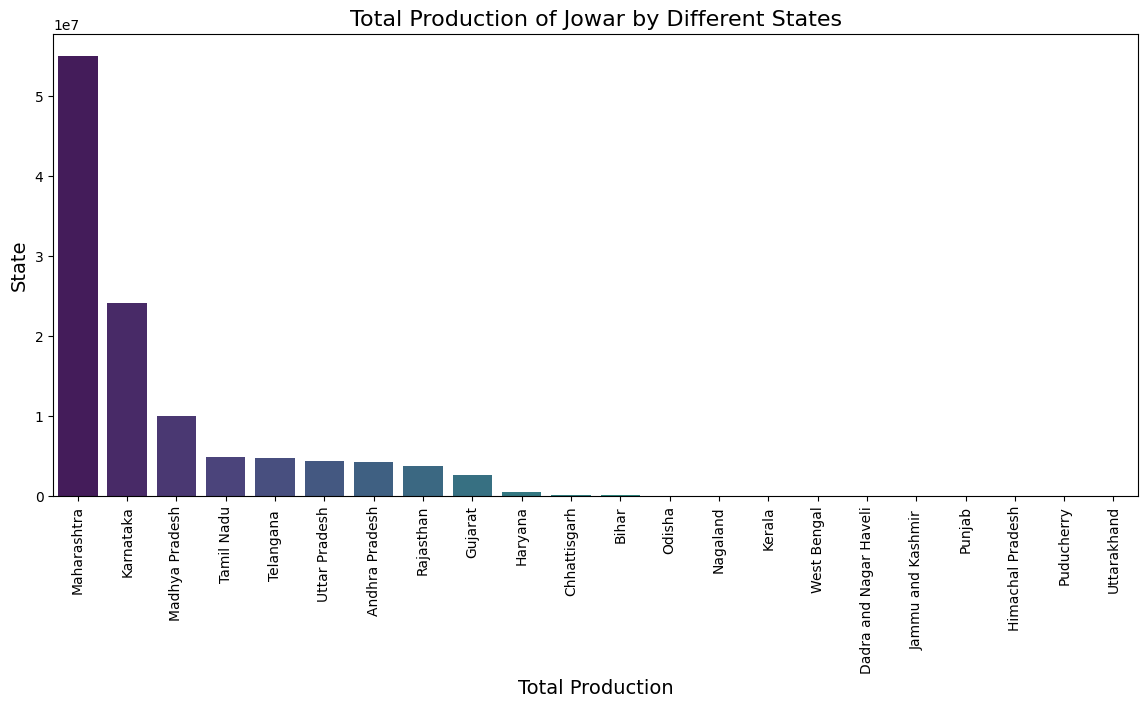

In [16]:
jowar_data = data[data['Crop'] == 'Jowar'].groupby('State_Name').agg({'Production': 'sum'})
sorted_jowar_data = jowar_data.sort_values(by='Production', ascending=False)
states = sorted_jowar_data.index.to_numpy()
production = sorted_jowar_data['Production'].to_numpy()
plt.figure(figsize=(14, 6))
palette = sns.color_palette("viridis", len(jowar_data))
sns.barplot(y=production, x=states,palette=palette, hue=states, legend=False)
plt.title('Total Production of Jowar by Different States', fontsize=16)
plt.xlabel('Total Production', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.show()

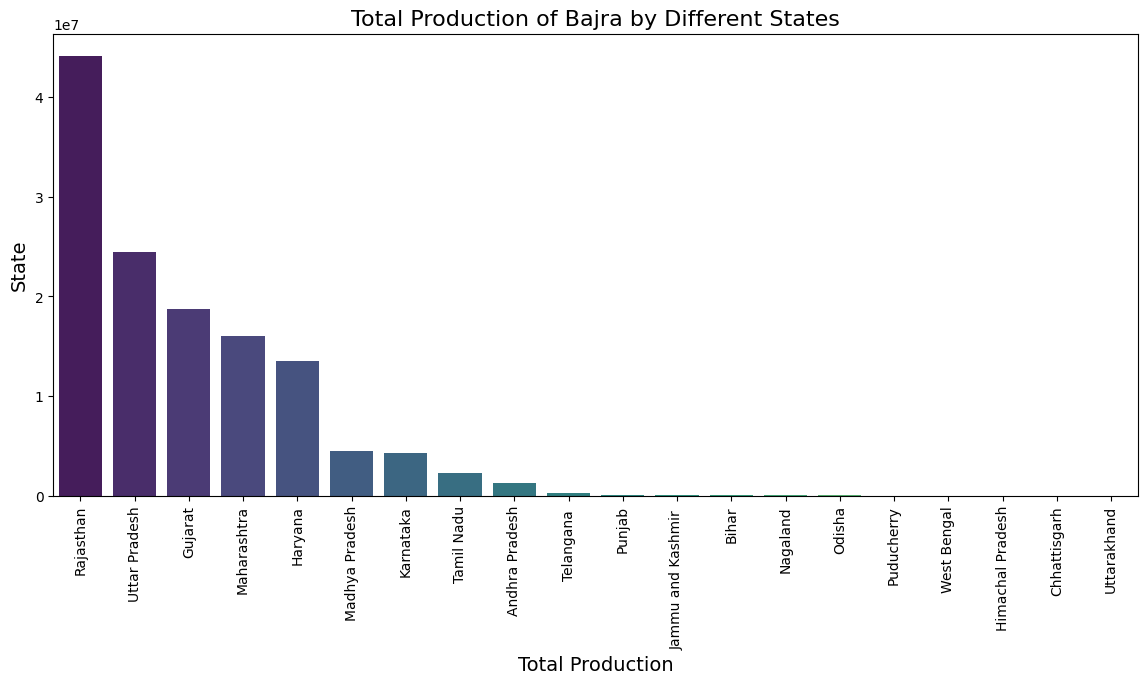

In [17]:
bajra_data = data[data['Crop'] == 'Bajra'].groupby('State_Name').agg({'Production': 'sum'})
sorted_bajra_data = bajra_data.sort_values(by='Production', ascending=False)
states = sorted_bajra_data.index.to_numpy()
production = sorted_bajra_data['Production'].to_numpy()
plt.figure(figsize=(14, 6))
palette = sns.color_palette("viridis", len(bajra_data))
sns.barplot(y=production, x=states,palette=palette, hue=states, legend=False)
plt.title('Total Production of Bajra by Different States', fontsize=16)
plt.xlabel('Total Production', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.show()

In [18]:
def top_producers():    
    top_producers = {}
    for crop in data['Crop'].unique():
        state_totals = data[data['Crop'] == crop].groupby(['State_Name', 'Crop'])['Production'].sum().reset_index()
        top_producers_by_crop = state_totals.nlargest(5, 'Production')
        top_producers_dict = top_producers_by_crop[['State_Name', 'Production']].to_dict('records')
        top_producers[crop] = top_producers_dict
    return top_producers

In [19]:
dic = top_producers()

In [20]:
dic

{'Arecanut': [{'State_Name': 'Karnataka', 'Production': 16740994.0},
  {'State_Name': 'Kerala', 'Production': 1893641.85},
  {'State_Name': 'Assam', 'Production': 1010523.0},
  {'State_Name': 'West Bengal', 'Production': 278740.0},
  {'State_Name': 'Meghalaya', 'Production': 277737.0}],
 'Other Kharif pulses': [{'State_Name': 'Karnataka', 'Production': 976976.18},
  {'State_Name': 'Madhya Pradesh', 'Production': 949111.0},
  {'State_Name': 'Maharashtra', 'Production': 687460.0},
  {'State_Name': 'Rajasthan', 'Production': 490843.0},
  {'State_Name': 'Uttar Pradesh', 'Production': 330090.0}],
 'Rice': [{'State_Name': 'West Bengal', 'Production': 258092849.0},
  {'State_Name': 'Uttar Pradesh', 'Production': 218793359.0},
  {'State_Name': 'Punjab', 'Production': 179702000.0},
  {'State_Name': 'Andhra Pradesh', 'Production': 143742455.0},
  {'State_Name': 'Odisha', 'Production': 119422742.0}],
 'Banana': [{'State_Name': 'Tamil Nadu', 'Production': 58716087.0},
  {'State_Name': 'Gujarat', '

In [21]:
dic['Bajra']

[{'State_Name': 'Rajasthan', 'Production': 44172355.0},
 {'State_Name': 'Uttar Pradesh', 'Production': 24421607.0},
 {'State_Name': 'Gujarat', 'Production': 18724400.0},
 {'State_Name': 'Maharashtra', 'Production': 16029469.0},
 {'State_Name': 'Haryana', 'Production': 13502100.0}]

In [22]:
dic['Rice']

[{'State_Name': 'West Bengal', 'Production': 258092849.0},
 {'State_Name': 'Uttar Pradesh', 'Production': 218793359.0},
 {'State_Name': 'Punjab', 'Production': 179702000.0},
 {'State_Name': 'Andhra Pradesh', 'Production': 143742455.0},
 {'State_Name': 'Odisha', 'Production': 119422742.0}]

In [23]:
data.head()

State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0

In [24]:
df_list = []
for crop, y in dic.items():
    df = pd.DataFrame(y)
    df['Crop'] = crop
    df_list.append(df)
combined_df = pd.concat(df_list, ignore_index=True)
fig = go.Figure(data=[go.Table(
    header=dict(values=['Crop', 'State Name', 'Production']),
    cells=dict(values=[combined_df['Crop'], combined_df['State_Name'], combined_df['Production']])
)])
fig.update_layout(
    title='Top 5 Producers by Crop (Total Production)',
    font=dict(size=12)
)
fig.show()

In [25]:
# season = data['Season'].unique()
# data[data['Season'] == 'Kharif']
unique_crops_according_to_season = data.groupby('Season')['Crop'].unique()
unique_crops_according_to_season_dict = unique_crops_according_to_season.to_dict()
for season, crops in unique_crops_according_to_season_dict.items():
    print(f"Season: {season}, Unique Crops: {list(crops)}")


Season: Autumn     , Unique Crops: ['Rice', 'Sugarcane', 'Paddy', 'Maize', 'Ragi', 'Dry chillies', 'Jute', 'Onion', 'Turmeric', 'Banana', 'Dry ginger', 'Peas & beans (Pulses)', 'Potato', 'Sesamum', 'Soyabean', 'Cotton(lint)', 'Sweet potato', 'Tapioca', 'Arhar/Tur', 'Groundnut', 'Urad', 'Moong(Green Gram)', 'Sannhamp', 'Small millets', 'Jowar']
Season: Kharif     , Unique Crops: ['Arecanut', 'Other Kharif pulses', 'Rice', 'Arhar/Tur', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Dry chillies', 'Groundnut', 'Horse-gram', 'Jowar', 'Korra', 'Maize', 'Moong(Green Gram)', 'Ragi', 'Sugarcane', 'Sunflower', 'Tobacco', 'Masoor', 'Sesamum', 'Urad', 'Gram', 'Onion', 'other misc. pulses', 'Samai', 'Small millets', 'Soyabean', 'Mesta', 'Cowpea(Lobia)', 'other oilseeds', 'Brinjal', 'Coriander', 'Grapes', 'Lemon', 'Linseed', 'Mango', 'Papaya', 'Pome Granet', 'Sapota', 'Tomato', 'Turmeric', 'Cabbage', 'Cashewnut', 'Potato', 'Sweet potato', 'Niger seed', 'Tapioca', 'Dry ginger', 'Safflower', 'Varagu', 'Jut

In [26]:
crop_seasons = {}
for season, crops in unique_crops_according_to_season_dict.items():
    for crop in crops:
        if crop not in crop_seasons:
            crop_seasons[crop] = []
        crop_seasons[crop].append(season.strip())
common_crops = {crop: seasons for crop, seasons in crop_seasons.items() if len(seasons) > 1}
for crop, seasons in common_crops.items():
    print(f"Crop: {crop}, Common in Seasons: {seasons}")

Crop: Rice, Common in Seasons: ['Autumn', 'Kharif', 'Rabi', 'Summer', 'Whole Year', 'Winter']
Crop: Sugarcane, Common in Seasons: ['Autumn', 'Kharif', 'Rabi', 'Summer', 'Whole Year', 'Winter']
Crop: Paddy, Common in Seasons: ['Autumn', 'Kharif', 'Rabi', 'Summer', 'Winter']
Crop: Maize, Common in Seasons: ['Autumn', 'Kharif', 'Rabi', 'Summer', 'Whole Year', 'Winter']
Crop: Ragi, Common in Seasons: ['Autumn', 'Kharif', 'Rabi', 'Summer', 'Whole Year', 'Winter']
Crop: Dry chillies, Common in Seasons: ['Autumn', 'Kharif', 'Rabi', 'Summer', 'Whole Year', 'Winter']
Crop: Jute, Common in Seasons: ['Autumn', 'Kharif', 'Rabi', 'Summer']
Crop: Onion, Common in Seasons: ['Autumn', 'Kharif', 'Rabi', 'Summer', 'Whole Year', 'Winter']
Crop: Turmeric, Common in Seasons: ['Autumn', 'Kharif', 'Rabi', 'Summer', 'Whole Year', 'Winter']
Crop: Banana, Common in Seasons: ['Autumn', 'Kharif', 'Rabi', 'Summer', 'Whole Year', 'Winter']
Crop: Dry ginger, Common in Seasons: ['Autumn', 'Kharif', 'Rabi', 'Summer', 

C:\Users\Abhinav\AppData\Local\Temp\ipykernel_7084\2526031746.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




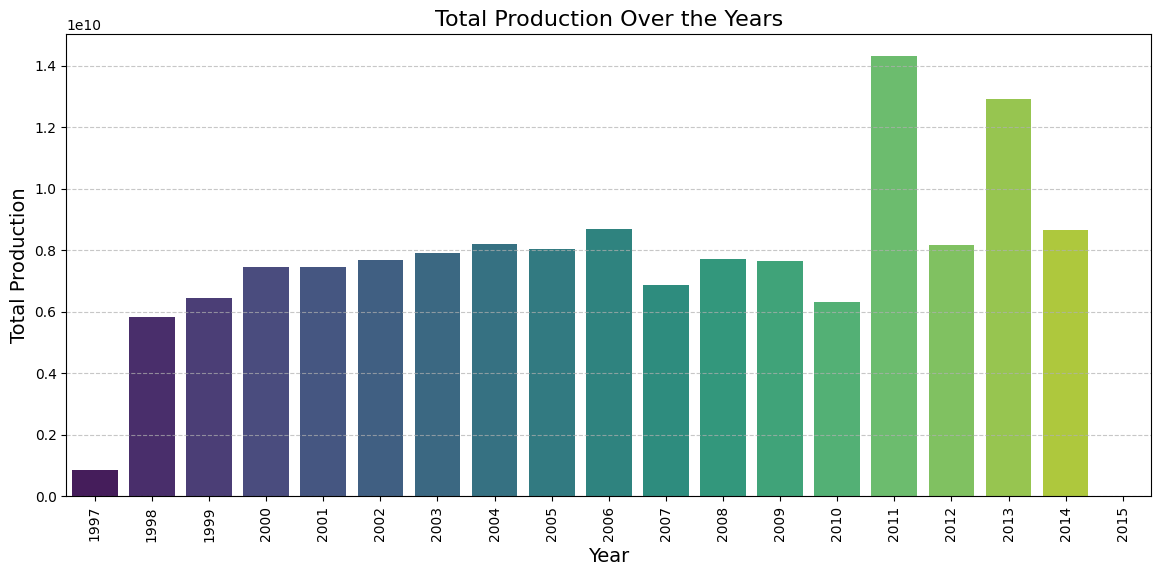

In [27]:
yearly_production = data.groupby('Crop_Year')['Production'].sum().reset_index()
plt.figure(figsize=(14, 6))
sns.barplot(data=yearly_production, x='Crop_Year', y='Production', palette="viridis")
plt.title('Total Production Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Production', fontsize=14)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [28]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
total_production = data.groupby('Crop')['Production'].sum().reset_index()
top_crops = total_production.sort_values(by='Production', ascending=False).head(10)['Crop'].tolist()
# Create subplots for the top 10 crops
fig = make_subplots(
    rows=len(top_crops), 
    cols=1, 
    shared_xaxes=True, 
    vertical_spacing=0.04,
    subplot_titles=top_crops
)

for i, crop in enumerate(top_crops, start=1):
    crop_data = data[data['Crop'] == crop].groupby('Crop_Year')['Production'].sum().reset_index()
    
    fig.add_trace(go.Bar(x=crop_data['Crop_Year'], y=crop_data['Production'], name=crop),
                  row=i, col=1)

fig.update_layout(
    height=300 * len(top_crops),
    title_text='Top 10 Crop Production Trends Over the Years',
    showlegend=False,
    template='plotly_white',
    title_x=0.5
)
fig.update_xaxes(title_text='Year', tickangle=-45)
fig.update_yaxes(title_text='Total Production')
fig.show()
#this plot not visible in github so i have added image which you can see in the directory
